# Signals and Sampling
In this notebook, we will be exploring how signals look, how they are processed and sampled. We will be using the healthy cough sound to explore these properties of signals.

This script is based on the Standford MIR project found [here](https://github.com/stevetjoa/stanford-mir).

Use [librosa.load](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load) to load an audio file into an audio array. Return both the audio array as well as the sample rate:

In [18]:
import librosa
parentDir = 'coughs/'
fileName = parentDir + 'HealthyCoughs.wav'
x, sr = librosa.load(fileName)

If you receive an error with librosa.load, you may need to [install ffmpeg](https://librosa.github.io/librosa/install.html#ffmpeg).

Display the length of the audio array and sample rate:

In [19]:
print(x.shape)
print(sr)

(7938,)
22050


### Visualizing Audio

In order to display plots inside the Jupyter notebook, run the following commands, preferably at the top of your notebook:

In [20]:
%matplotlib inline
import seaborn # optional
import matplotlib.pyplot as plt
import librosa.display

Plot the audio array using [librosa.display.waveplot](https://librosa.github.io/librosa/generated/librosa.display.waveplot.html#librosa.display.waveplot):

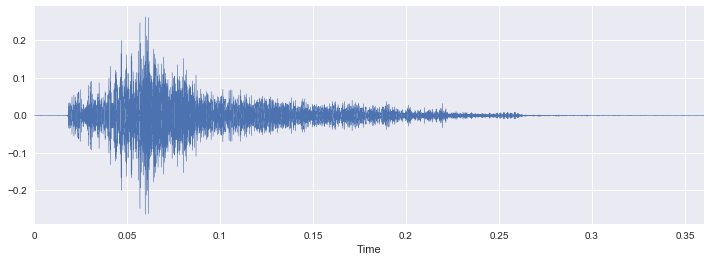

In [21]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

Display a spectrogram using [librosa.display.specshow](https://librosa.github.io/librosa/generated/librosa.display.specshow.html):

E:\Dev\WinPython-64bit-3.5.3.0Qt5\python-3.5.3.amd64\lib\site-packages\librosa\core\spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


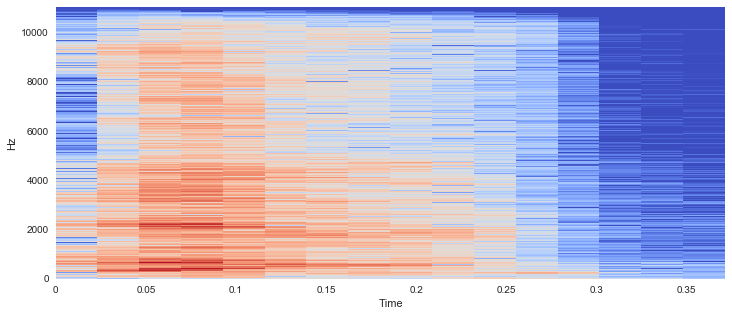

In [22]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

### Playing and Writing Audio
Using [IPython.display.Audio](http://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio), you can play an audio file:

In [23]:
import IPython.display as ipd
ipd.Audio(fileName) # load a local WAV file

Audio can also accept a NumPy array. Let's synthesize a pure tone at 440 Hz:

In [24]:
import numpy
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
tone = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

Listen to the audio array:

In [25]:
ipd.Audio(tone, rate=sr) # load a NumPy array

Let's do some basic processing to the cough audio signal. We will do a low pass filter of the signal the old fashioned way

In [26]:
X = numpy.fft.rfft(x)

#Determine the frequencies of the FFT
W = numpy.fft.fftfreq(X.size, d=1.0/sr)

# If our original signal time was in seconds, this is now in Hz    
# low pass signal
cut_X = X.copy()
cut_X[(W<100)] = 0

cut_signal = numpy.fft.irfft(cut_X)

Plot the audio array using [librosa.display.waveplot](https://librosa.github.io/librosa/generated/librosa.display.waveplot.html#librosa.display.waveplot) or [librosa.display.specshow](https://librosa.github.io/librosa/generated/librosa.display.specshow.html):

E:\Dev\WinPython-64bit-3.5.3.0Qt5\python-3.5.3.amd64\lib\site-packages\librosa\core\spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


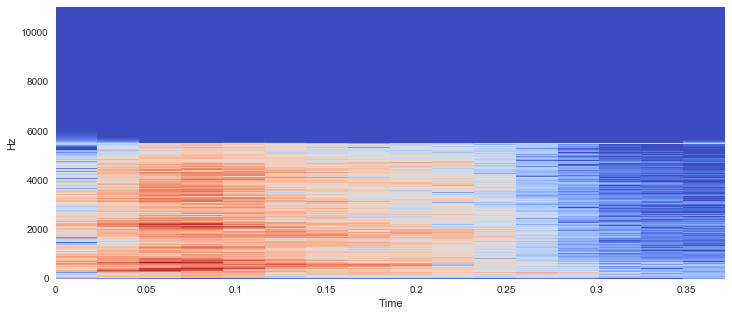

In [27]:
#plt.figure(figsize=(12, 4))
#librosa.display.waveplot(cut_signal, sr=sr)

X = librosa.stft(cut_signal)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

Play the result

In [28]:
ipd.Audio(cut_signal, rate=sr) # load a NumPy array

librosa.output.write_wav saves a NumPy array to a WAV file.

In [29]:
outFileName = parentDir + 'HealthyCough_lpass.wav'
librosa.output.write_wav(outFileName, cut_signal, sr)

How would you do high pass filtering?